In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
titanic_data = pd.read_csv('C:/Users/Mazen.Atta/Downloads/Titanic/Projects/Titanic/train.csv')
titanic_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
#titanic_data.info(memory_usage=False)
titanic_data.describe()
#titanic_data.isnull().sum()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


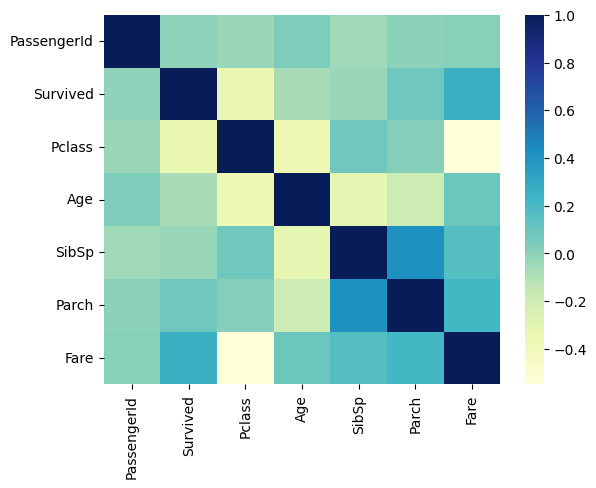

In [74]:
sns.heatmap(titanic_data.corr(), cmap = "YlGnBu")
plt.show()

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit

In [76]:
split =  StratifiedShuffleSplit(n_splits = 1, test_size = .2)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived" , "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]


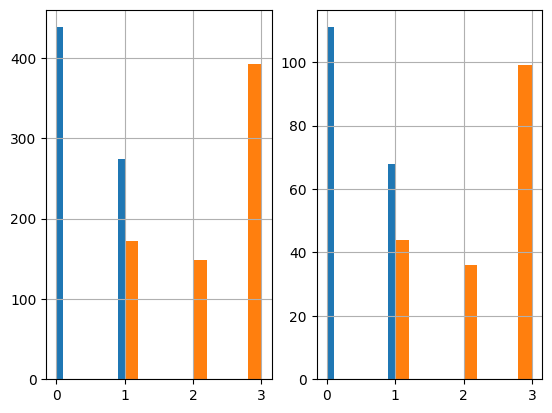

In [77]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
#strat_train_set['Sex'].hist()


plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
#strat_test_set['Sex'].hist()

plt.show()

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    
    def fit(self,X, y =None):
        return self
    
    def transform(self, X):
        imputer =  SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [79]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X ,y = None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_name = ["C","S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_name = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_name[i]] = matrix.T[i]
            
        return X

In [80]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y = None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis =1, errors = "ignore")

In [81]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [82]:
strat_train_set = pipeline.fit_transform(strat_train_set)

strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
183,184,1,2,1.000000,2,1,39.0000,0.0,0.0,1.0,0.0,1.0
666,667,0,2,25.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
483,484,1,3,63.000000,0,0,9.5875,0.0,0.0,1.0,1.0,0.0
280,281,0,3,65.000000,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
264,265,0,3,29.771388,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
774,775,1,2,54.000000,1,3,23.0000,0.0,0.0,1.0,1.0,0.0
641,642,1,1,24.000000,0,0,69.3000,1.0,0.0,0.0,1.0,0.0
524,525,0,3,29.771388,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
508,509,0,3,28.000000,0,0,22.5250,0.0,0.0,1.0,0.0,1.0


In [83]:
strat_train_set.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 183 to 39
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)

In [84]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set["Survived"]


scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()



In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4],
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score= True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [86]:
final_clf = grid_search.best_estimator_

In [87]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=500)

In [88]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [89]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
506,507,1,2,33.000000,0,2,26.0000,0.0,0.0,1.0,1.0,0.0
540,541,1,1,36.000000,0,2,71.0000,0.0,0.0,1.0,1.0,0.0
137,138,0,1,37.000000,1,0,53.1000,0.0,0.0,1.0,0.0,1.0
535,536,1,2,7.000000,0,2,26.2500,0.0,0.0,1.0,1.0,0.0
9,10,1,2,14.000000,1,0,30.0708,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,1,1,24.000000,0,0,83.1583,1.0,0.0,0.0,1.0,0.0
207,208,1,3,26.000000,0,0,18.7875,1.0,0.0,0.0,0.0,1.0
612,613,1,3,29.415517,1,0,15.5000,0.0,1.0,0.0,1.0,0.0
130,131,0,3,33.000000,0,0,7.8958,1.0,0.0,0.0,0.0,1.0


In [90]:
X_test = strat_test_set.drop(["Survived"], axis= 1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [91]:
final_clf.score(X_data_test, y_data_test)

0.8379888268156425

In [92]:
final_data = pipeline.fit_transform(titanic_data)

In [94]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [96]:
X_final = final_data.drop(["Survived"], axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()


In [97]:
prod_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 4],
}

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score= True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [99]:
prod_final_clf = grid_search.best_estimator_

In [100]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [102]:
titanic_test_data = pd.read_csv('C:/Users/Mazen.Atta/Downloads/Titanic/Projects/Titanic/test.csv')
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [104]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [106]:
X_final_test = final_test_data
X_final_test =  X_final_test.fillna(method='ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)


In [107]:
predictions = prod_final_clf.predict(X_data_final_test)

In [108]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('C:/Users/Mazen.Atta/Downloads/Titanic/Projects/Titanic/submission.csv', index=False)

In [110]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
